# Phishing Webiste Detection

In [2]:
import numpy as np 
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from pylab import rcParams
import plotly
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff

In [3]:
df=pd.read_csv("dataset.csv")
df.head(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### EDA

In [4]:
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [7]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#1-> Legitimate
#-1-> Phishing

In [9]:
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [10]:
# Print correlation with target variable
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


<AxesSubplot:>

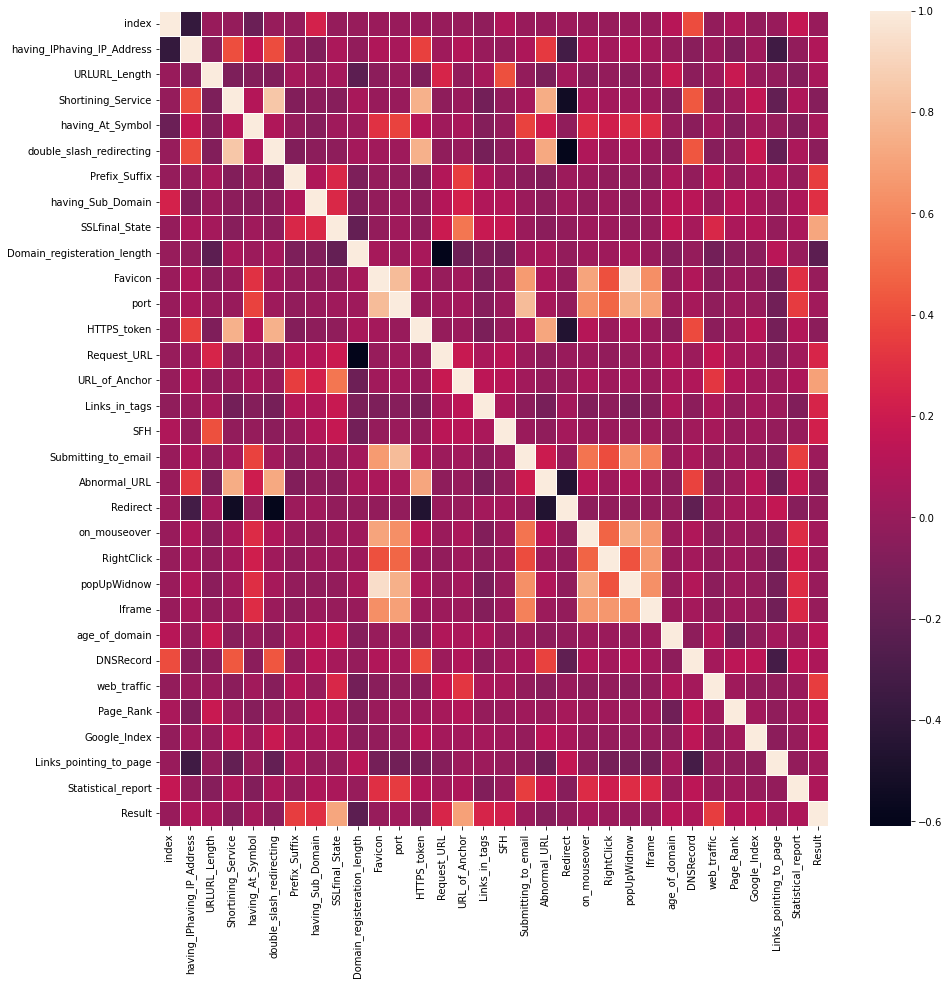

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

## Model 1: Neural Network 

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.
A Neural Network is a working system at the heart of a Deep Learning algorithm that helps it process raw data.In fact, Neural Networks are pretty much like the human brain.Like our brain that’s formed of a network of neurons, Neural Networks are based on connected nodes or units – technically known as artificial neurons.They are used to identify hidden correlations and patterns in raw data, classify them, and continuously improve.

In [84]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=31, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [85]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
history = model.fit(train_X,train_Y,batch_size=1,epochs=5)

Epoch 1/5
7738/7738 [==============================] - 6s 791us/step - loss: 0.0000e+00 - accuracy: 0.5557
Epoch 2/5
7738/7738 [==============================] - 6s 786us/step - loss: 0.0000e+00 - accuracy: 0.5557
Epoch 3/5
7738/7738 [==============================] - 6s 752us/step - loss: 0.0000e+00 - accuracy: 0.5557
Epoch 4/5
7738/7738 [==============================] - 6s 824us/step - loss: 0.0000e+00 - accuracy: 0.5557
Epoch 5/5
7738/7738 [==============================] - 6s 794us/step - loss: 0.0000e+00 - accuracy: 0.5557


In [87]:
y_pred = model.predict(test_X)

In [88]:
accuracy_score(y_pred,test_Y)

0.5598432318359964

## Model 2:  Artificial Neural Network

Most folks consider Artificial Neural Networks synonymous with Neural Networks. However, both aren’t one and the same. Instead, an ANN is a type of Neural Network.

ANN is essentially a feed-forward network because of the way information travels through it — from one layer to another without touching a node twice.

This type of neural system — patterned around how neurons work in our brain — recognizes patterns in raw data, helping solve complex processes.

Another similarity with the human brain: the ANN improves with every new input it gets. In a nutshell, ANN makes independent improvements — or is continuously improving.

Now to dive into the composition of this Neural Network. The ANN is based on three or more interconnected layers of nodes — again, similar to the brain.

All layers are responsible for inputting, processing, and outputting data to the deeper layers. Such an interlayered system is what helps this Neural Network understand and learn complex things.

In [62]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 31))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [63]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [65]:
classifier.fit(train_X,train_Y, batch_size = 1, epochs = 5)

Epoch 1/5
7738/7738 [==============================] - 6s 839us/step - loss: -23446900.0000
Epoch 2/5
7738/7738 [==============================] - 6s 755us/step - loss: -28416736.0000
Epoch 3/5
7738/7738 [==============================] - 6s 737us/step - loss: -33947456.0000
Epoch 4/5
7738/7738 [==============================] - 6s 780us/step - loss: -40463300.0000
Epoch 5/5
7738/7738 [==============================] - 6s 757us/step - loss: -47660664.0000


In [72]:
Y_pred = classifier.predict(test_X)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

In [73]:
accuracy_score(Y_pred,test_Y)

0.2827856496834489

## Conclusion

From the following we can understand that Neural network is slightly better than the artificial neural network to identfy phishing websites. 